In [136]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.stats import mode

## Generate Master Darks and Flat

In [137]:
# Load fits files for 2s and 1.5s dark exposures, use ms values for naming consistency
dark_1500ms = []
dark_2000ms = []

# Make list of 2s darks
for i in range(0,10):
    fname = '../data/dark_R_2s.0000000{0}.DARK.FIT'.format(i+1)
    try: 
        file = fits.open(fname)
    except FileNotFoundError:
        fname = fits.open('../data/dark_R_2s.00000010.DARK.FIT')

    dark_2000ms.append(file[0].data)
    file.close()

# Dark of 1.5s darks
for i in range(10,20):
    fname = '../data/dark_R_1.5s.000000{0}.DARK.FIT'.format(i+1)
    file = fits.open(fname)
    dark_1500ms.append(file[0].data)
    file.close()
    
m_dark_1500ms = np.empty(shape=dark_1500ms[0].shape)       # Make blank arrays of 1024 by 1024
m_dark_2000ms = np.empty(shape=dark_2000ms[0].shape)
for y in range(len(dark_1500ms)):                          # For each y value
    for x in range(len(dark_1500ms)):                      # and each x value
        pixel_list_1500ms = []                             # (clear)
        pixel_list_2000ms = []
        for dark in dark_1500ms:                           # and every dark frame
            pixel_list_1500ms.append(dark_1500ms[y][x])    # Make a list of the value in the y,x pixel by
        for dark in dark_2000ms:                              
            pixel_list_2000ms.append(dark_2000ms[y][x])    
            m_dark_1500ms[y][x] = np.median(pixel_list_1500ms) # And store the median value to the y,x pixel of master

Mean: 1010.63
SDev: 71.34
Medn: 1010.00
Mode: 1010.00
Range of values: 971 to 40048


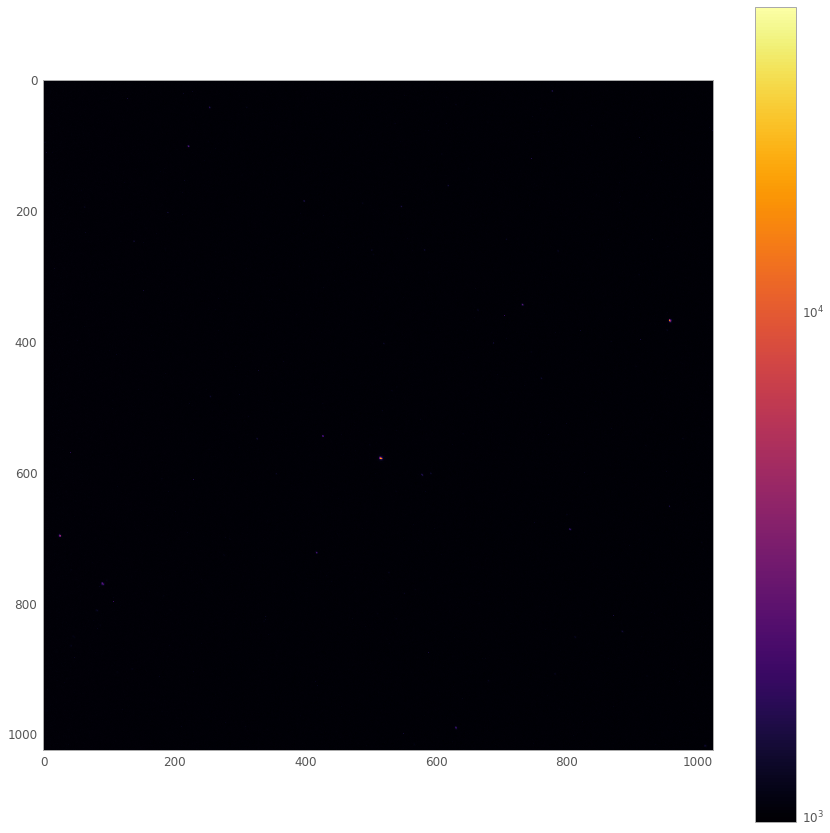

In [153]:
# Run a test science image before making a loop cell for all science images
test_science = fits.open('../data/hd209458_R_1_5s_start_series1000.00001003.FIT')

# Stats of test image
test_mu = np.mean(test_science[0].data.flatten())
test_sig = np.std(test_science[0].data.flatten())
test_med = np.median(test_science[0].data.flatten())
test_mode = float(mode(test_science[0].data.flatten())[0])
print('Mean: {0:4.2f}\nSDev: {1:4.2f}\nMedn: {2:4.2f}\nMode: {3:4.2f}'.format(test_mu, test_sig, test_med, test_mode))
print('Range of values: {0} to {1}'.format(test_science[0].data.flatten().min(), test_science[0].data.flatten().max()))

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
image = ax.imshow(test_science[0].data, cmap='inferno',
          norm=LogNorm(vmin=test_science[0].data.min(), vmax=test_science[0].data.max()))
ax.grid(False)
plt.colorbar(image, ax=ax)

#plt.hist(test_science[0].data.flatten(), log=True, bins=1000)

test_science.close()

ValueError: Colormap 1 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r